In [1]:
#importing important 

In [2]:
from math import sqrt
from keras.layers import LSTM
from keras.layers import merge, Input, Dense, TimeDistributed, Lambda                                   
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
import pandas as pd
import numpy as np
from keras import optimizers
#from keras import activation
from keras.layers import Dense, Softmax, Dropout
from keras.layers import Activation, Dense

Using TensorFlow backend.


In [3]:
#loading data
Station14=pd.read_csv('wind14.csv')
Station13=pd.read_csv('wm013.csv')

/usr/lib/python3/dist-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (26,27,28,29) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
#Adding index to our time frame
time_series = pd.Series([(10*i) for  i in  Station13.index])
#printing the shape
Station13.shape

(105264, 47)

In [8]:
# extracting all calculated mean features for station 13
new_columns1 = [Station13.loc[:, name] for name in Station13.columns if name.endswith("mean") and not name.startswith("WS_")]
new_columns1.insert(0, time_series)
# return the date time on our datab frame
result1 = pd.concat(new_columns1, axis=1)
result1=result1.rename(columns={0:"time"})
result1.loc[:3]

,time,WS_62_mean,WS_60_mean,WS_40_mean,WS_20_mean,WS_10_mean,WD_60_mean,WD_20_mean,Tair_mean,Tgrad_mean,Pbaro_mean,RH_mean
0,0,4.1629,4.0932,3.2474,2.7962,2.1617,5.9467,37.2267,17.58,1.251,1009.28,95.5
1,10,4.0387,3.9846,3.3663,2.9733,2.2545,7.0867,37.4267,17.49,1.179,1009.04,95.6
2,20,3.7964,3.7462,3.6693,2.8509,2.1505,8.5867,37.4867,17.32,1.077,1009.04,95.7
3,30,4.0927,4.0783,4.0395,2.8838,2.1941,5.8367,29.9067,17.33,1.168,1008.80,96.3


In [6]:
# extracting all calculated mean features for station 13
new_columns2 = [Station14.loc[:, name] for name in Station14.columns if name.endswith("mean") and not name.startswith("WS_")]
new_columns2.insert(0, time_series)
result2 = pd.concat(new_columns2, axis=1)

In [9]:
# return the date time on our datab frame
result1=result1.rename(columns={0:"time"})
result1.loc[:3]

,time,WS_62_mean,WS_60_mean,WS_40_mean,WS_20_mean,WS_10_mean,WD_60_mean,WD_20_mean,Tair_mean,Tgrad_mean,Pbaro_mean,RH_mean
0,0,4.1629,4.0932,3.2474,2.7962,2.1617,5.9467,37.2267,17.58,1.251,1009.28,95.5
1,10,4.0387,3.9846,3.3663,2.9733,2.2545,7.0867,37.4267,17.49,1.179,1009.04,95.6
2,20,3.7964,3.7462,3.6693,2.8509,2.1505,8.5867,37.4867,17.32,1.077,1009.04,95.7
3,30,4.0927,4.0783,4.0395,2.8838,2.1941,5.8367,29.9067,17.33,1.168,1008.80,96.3


In [10]:
# Station13
result1=result1.rename(columns={0:"time"})
result1.loc[:6]


,time,WS_62_mean,WS_60_mean,WS_40_mean,WS_20_mean,WS_10_mean,WD_60_mean,WD_20_mean,Tair_mean,Tgrad_mean,Pbaro_mean,RH_mean
0,0,4.1629,4.0932,3.2474,2.7962,2.1617,5.9467,37.2267,17.58,1.251,1009.28,95.5
1,10,4.0387,3.9846,3.3663,2.9733,2.2545,7.0867,37.4267,17.49,1.179,1009.04,95.6
2,20,3.7964,3.7462,3.6693,2.8509,2.1505,8.5867,37.4867,17.32,1.077,1009.04,95.7
3,30,4.0927,4.0783,4.0395,2.8838,2.1941,5.8367,29.9067,17.33,1.168,1008.80,96.3
4,40,4.1275,4.0969,4.0756,3.0342,2.3205,4.4467,27.9667,17.33,1.183,1008.80,96.2
5,50,4.2952,4.2583,3.8889,3.1915,2.3971,4.9567,20.2467,17.28,1.170,1008.80,96.2
6,60,3.8225,3.7927,3.5946,2.6955,1.9207,3.8867,18.2367,17.13,1.087,1008.80,96.4


In [11]:
#station14

In [14]:
result2=result2.rename(columns={0:"time"})
result2.loc[:3]

,time,WS_62_mean,WS_60_mean,WS_40_mean,WS_20_mean,WS_10_mean,WD_60_mean,WD_20_mean,Tair_mean,Tgrad_mean,Pbaro_mean,RH_mean
0,0,8.1984,8.2188,7.3425,6.5802,5.6578,245.0333,247.4333,10.68,0.853,800.72,37.47
1,10,8.1053,8.1196,7.2618,6.4809,5.7014,244.9333,249.0333,10.58,0.716,800.72,37.90
2,20,8.7696,8.7834,7.6775,6.7479,5.7450,243.7333,246.9333,10.53,0.863,800.72,38.57
3,30,8.9869,9.0129,7.9133,7.0398,6.1683,242.3333,244.5333,10.66,0.927,800.72,38.21


In [15]:
## Hourly data extraction
# converting10 min time interval data in to hours
num_hour1 = [i for i in range(5,len(result1),6)]
num_hour2 = [i for i in range(5,len(result2),6)]

In [16]:
# converting time to 1 hour
result_hour1 = result1.iloc[num_hour1]
result_hour2 = result2.iloc[num_hour1]

In [17]:
#dropping the index
result_hour1 =result_hour1.reset_index(drop=True)
result_hour2 =result_hour2.reset_index(drop=True)

In [18]:
#Station13
Stat13=result_hour1
Stat13.head(3)

,time,WS_62_mean,WS_60_mean,WS_40_mean,WS_20_mean,WS_10_mean,WD_60_mean,WD_20_mean,Tair_mean,Tgrad_mean,Pbaro_mean,RH_mean
0,50,4.2952,4.2583,3.8889,3.1915,2.3971,4.9567,20.2467,17.28,1.170,1008.80,96.2
1,110,3.7032,3.6493,2.9830,2.4108,1.7799,16.7367,13.0367,16.25,0.797,1008.56,98.8
2,170,4.9374,4.8698,3.9754,2.1392,1.2878,1.3667,337.955,16.32,2.159,1008.32,99.4


In [19]:
#Station14
Stat14=result_hour2
Stat14.head(3)

,time,WS_62_mean,WS_60_mean,WS_40_mean,WS_20_mean,WS_10_mean,WD_60_mean,WD_20_mean,Tair_mean,Tgrad_mean,Pbaro_mean,RH_mean
0,50,8.2978,8.3119,7.5224,6.7541,5.7761,244.1333,246.1333,10.67,0.860,800.72,38.17
1,110,7.9687,7.9769,6.9951,5.9841,5.1517,244.6333,247.9333,10.54,0.887,800.48,39.08
2,170,7.8694,7.8839,6.9640,6.1207,5.2469,244.6333,244.8333,10.13,0.965,800.48,38.55


In [20]:
#checking and removing if there is null

In [22]:
Stat14.dropna(inplace=True)
Stat14.isnull().sum().sum()

0

In [23]:
#checking and removing if there is null
Stat13.dropna(inplace=True)
Stat13.isnull().sum().sum()

0

In [24]:
#checking length and resizing for both stations

In [25]:
Stat13.shape
Stat13=Stat13[:17314]
Stat13.shape

(17314, 12)

In [26]:
Stat14.shape
Stat14=Stat14
Stat14.shape

(17314, 12)

#


# For one  stations


#

In [27]:
from sklearn import preprocessing

In [28]:
#WS_60_mean feature can be changed frequently, depeding on what reature to predict
Station13or14 =pd.concat( [Stat13[' WS_40_mean']], axis=1)

In [30]:
#printing the Wind Speed feature data frame to be used
Station13or14.head()

,WS_40_mean
0,3.8889
1,2.9830
2,3.9754
3,2.4062
4,2.6986


In [31]:

# defining a function that converts my data in to a supervised way
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	dff = pd.DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(dff.shift(i))
		names += [('Feature%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(dff.shift(-i))
		if i == 0:
			names += [('Output%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('Output%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = pd.concat(cols,axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

In [48]:
#scale all features in range of [0,1].
values = Station13or14.values 
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
#setting for number of look backs
look_back_hours=1
# frame as supervised learning
reframed = series_to_supervised(scaled, look_back_hours, 1)
# drop columns we don't want to predict
reframed.drop(reframed.columns[[]], axis=1, inplace=True)
print(reframed.head())


   Feature1(t-1)  Output1(t)
1       0.204561    0.154235
2       0.154235    0.209366
3       0.209366    0.122191
4       0.122191    0.138435
5       0.138435    0.182956


In [49]:
# split into train and test sets
values = reframed.values
n_train_time = int(len(values)*0.76)
train = values[:n_train_time, :]
test = values[int(len(train)):int(len(values)*0.90), :]
valid =values[int(len(values)*0.90):,:]

n_features = Station13or14.shape[-1]
n_obs = look_back_hours * n_features
train_X, train_y = train[:, 0:n_obs], train[:, -n_features]
test_X, test_y = test[:, 0:n_obs], test[:, -n_features]
valid_X, valid_y = valid[:, 0:n_obs], valid[:, -n_features]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], look_back_hours, n_features))
test_X = test_X.reshape((test_X.shape[0], look_back_hours, n_features))
valid_X = valid_X.reshape((valid_X.shape[0], look_back_hours, n_features))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape, valid_X.shape, valid_y.shape)

(13157, 1, 1) (13157,) (2424, 1, 1) (2424,) (1732, 1, 1) (1732,)


In [50]:
#For two stations
model = Sequential()
model.add(LSTM(64, return_sequences= True, activation='sigmoid', input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dropout(0.1))
model.add(LSTM(32, activation='sigmoid',return_sequences=True ))
model.add(Dropout(0.1))
model.add(LSTM(32, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))
sgd = optimizers.SGD(lr=0.2, decay=1e-5, momentum=0.9, nesterov=True)
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 1, 64)             16896     
_________________________________________________________________
dropout_3 (Dropout)          (None, 1, 64)             0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 1, 32)             12416     
_________________________________________________________________
dropout_4 (Dropout)          (None, 1, 32)             0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 37,665
Trainable params: 37,665
Non-trainable params: 0
_________________________________________________________________


In [52]:
# model fit
history = model.fit(train_X, train_y, epochs=100, batch_size=400, validation_data=(valid_X, valid_y), verbose=0, shuffle=False)

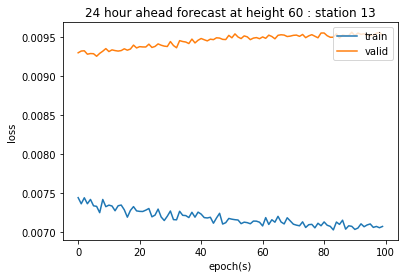

In [53]:
# summarize history for loss
pyplot.figure(figsize = (6,4))
pyplot.plot(history.history['loss'])
pyplot.plot(history.history['val_loss'])
pyplot.title('24 hour ahead forecast at height 60 : station 13')
pyplot.ylabel('loss')
pyplot.xlabel('epoch(s)')
pyplot.legend(['train', 'valid'], loc='upper right')
pyplot.show()

In [54]:
# make a prediction
predicted = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], look_back_hours*n_features))
# invert scaling for forecast
inv_predicted = concatenate((predicted, test_X[:, -n_features+1:]), axis=1)
inv_predicted = scaler.inverse_transform(inv_predicted)
inv_predicted = inv_predicted[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, -n_features+1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_predicted))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 1.452


#


# Multiple added  feature from another station



#

In [100]:
Station=pd.concat( [Stat13[' WS_40_mean'], Stat14[' WS_40_mean']], axis=1)
Station.dropna(inplace=True)
Station.head()

,WS_40_mean,WS_40_mean
0,3.8889,7.5224
1,2.9830,6.9951
2,3.9754,6.9640
3,2.4062,6.8213
4,2.6986,7.4790


In [101]:

# defining a function that converts my data in to a supervised way

def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	dff = pd.DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(dff.shift(i))
		names += [('Feature%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(dff.shift(-i))
		if i == 0:
			names += [('Output%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('Output%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = pd.concat(cols,axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

In [102]:
#scale all features in range of [0,1].

values2 = Station.values 
# normalize features,0.1
scaler2 = MinMaxScaler(feature_range=(0, 1))#scale all features in range of [0,1].

values2 = Station.values 
# normalize features,0.1
scaler2 = MinMaxScaler(feature_range=(0, 1))
scaled2 = scaler2.fit_transform(values2)
scaled2 = scaler2.fit_transform(values2)
# frame as supervised learning
look_back_hours2=1
reframed2 = series_to_supervised(scaled2, look_back_hours2, 1)

# drop columns we don't want to predict
reframed2.drop(reframed2.columns[[]], axis=1, inplace=True)
print(reframed2.head())


   Feature1(t-1)  Feature2(t-1)  Output1(t)  Output2(t)
1       0.204561       0.267759    0.154235    0.248407
2       0.154235       0.248407    0.209366    0.247266
3       0.209366       0.247266    0.122191    0.242029
4       0.122191       0.242029    0.138435    0.266166
5       0.138435       0.266166    0.182956    0.267304


In [118]:
# split into train and test sets
values2 = reframed2.values

n_train_time2 = int(len(values2)*0.76)
train2 = values2[:n_train_time, :]
test2 = values2[int(len(train2)):int(len(values2)*0.90), :]
valid2 =values2[int(len(values2)*0.90):,:]

n_features2 = Station.shape[-1]
n_obs2 = look_back_hours2 * n_features2
train_X2, train_y2 = train2[:, 0:n_obs2], train2[:, -n_features2]
test_X2, test_y2 = test2[:, 0:n_obs2], test2[:, -n_features2]
valid_X2, valid_y2 = valid2[:, 0:n_obs2], valid2[:, -n_features2]
# reshape input to be 3D [samples, timesteps, features]
train_X2 = train_X2.reshape((train_X2.shape[0], look_back_hours2, n_features2))
test_X2 = test_X2.reshape((test_X2.shape[0], look_back_hours2, n_features2))
valid_X2 = valid_X2.reshape((valid_X2.shape[0], look_back_hours2, n_features2))
print(train_X2.shape, train_y2.shape, test_X2.shape, test_y2.shape, valid_X2.shape, valid_y2.shape)

(13157, 1, 2) (13157,) (2420, 1, 2) (2420,) (1731, 1, 2) (1731,)


In [119]:
#For two stations
model = Sequential()
model.add(LSTM(64, return_sequences= True, activation='sigmoid', input_shape=(train_X2.shape[1], train_X2.shape[2])))
model.add(Dropout(0.1))
model.add(LSTM(32, activation='sigmoid',return_sequences=True ))
model.add(Dropout(0.1))
model.add(LSTM(32, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))
sgd = optimizers.SGD(lr=0.2, decay=1e-5, momentum=0.9, nesterov=True)
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_21 (LSTM)               (None, 1, 64)             17152     
_________________________________________________________________
dropout_15 (Dropout)         (None, 1, 64)             0         
_________________________________________________________________
lstm_22 (LSTM)               (None, 1, 32)             12416     
_________________________________________________________________
dropout_16 (Dropout)         (None, 1, 32)             0         
_________________________________________________________________
lstm_23 (LSTM)               (None, 32)                8320      
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 33        
Total params: 37,921
Trainable params: 37,921
Non-trainable params: 0
_________________________________________________________________


In [120]:
# fit network
history = model.fit(train_X2, train_y2, epochs=100, batch_size=100, validation_data=(valid_X2, valid_y2), verbose=0, shuffle=False)

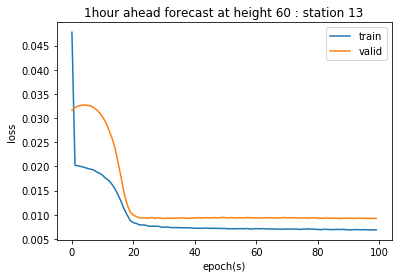

In [121]:
# summarize history for loss
pyplot.figure(figsize = (6,4))
pyplot.plot(history.history['loss'])
pyplot.plot(history.history['val_loss'])
pyplot.title('1hour ahead forecast at height 60 : station 13')
pyplot.ylabel('loss')
pyplot.xlabel('epoch(s)')
pyplot.legend(['train', 'valid'], loc='upper right')
pyplot.show()

In [122]:
# make a prediction
predicted2 = model.predict(test_X2)
test_X2 = test_X2.reshape((test_X2.shape[0], look_back_hours2*n_features2))
# invert scaling for forecast
inv_predicted2 = concatenate((predicted2, test_X2[:, -n_features2+1:]), axis=1)
inv_predicted2 = scaler.inverse_transform(inv_predicted2)
inv_predicted2= inv_predicted2[:,0]
# invert scaling for actual
test_y2 = test_y2.reshape((len(test_y2), 1))
inv_y2 = concatenate((test_y2, test_X2[:, -n_features2+1:]), axis=1)
inv_y2 = scaler.inverse_transform(inv_y2)
inv_y2 = inv_y2[:,0]
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y2, inv_predicted2))
print('Test RMSE: %.3f' % rmse)


Test RMSE: 1.430


#


# Persistence


#

In [123]:
#Persistence forecast

In [124]:

# Create lagged dataset
values = pd.DataFrame(inv_y)
values.dropna(inplace=True)
dataframe = pd.concat([values.shift(1), values], axis=1)
dataframe.columns = ['t', 't+1']
dataframe.dropna(inplace=True)
print(dataframe.head(5))

        t     t+1
1  0.3510  2.6445
2  2.6445  1.3932
3  1.3932  2.7403
4  2.7403  3.3009
5  3.3009  4.0843


In [125]:

# split into train and test sets
X = dataframe.values
train_size = int(len(X) * 0.66)
train, test = X[1:train_size], X[train_size:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]

In [126]:

# persistence model
def model_persistence(x):
	return x


In [127]:
predictions = list()
for x in test_X:
	yhat = model_persistence(x)
	predictions.append(yhat)
test_score = np.sqrt(mean_squared_error(test_y, predictions))
print('Test RMSE: %.3f' % test_score)

Test RMSE: 1.430


#


# Plots


#

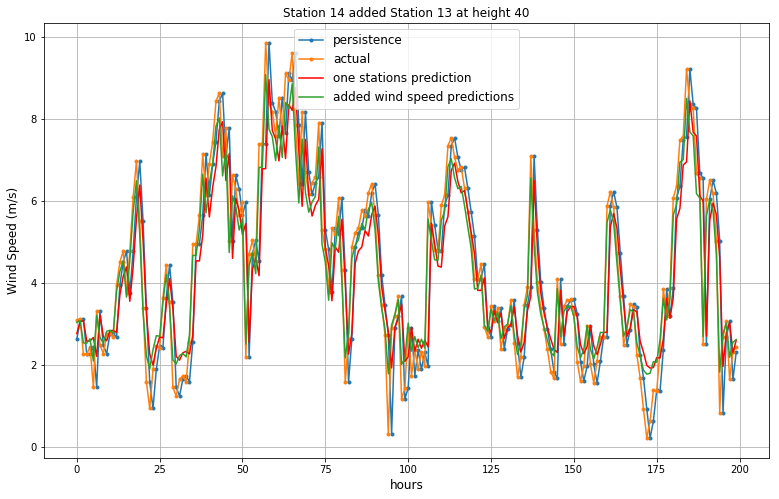

In [128]:
aa=[x for x in range(200)]
pyplot.figure(figsize = (13,8))
pyplot.plot(predictions[-200:],marker='.', label="persistence")
pyplot.plot(aa, inv_y[-200:], marker='.', label="actual")
pyplot.plot(aa, inv_predicted[-200:], 'r', label="one stations prediction")
pyplot.plot(aa, inv_predicted2[-200:], label="added wind speed predictions")
pyplot.ylabel('Wind Speed (m/s)', size=12)
pyplot.title("Station 14 added Station 13 at height 40")
pyplot.xlabel('hours', size=12)
pyplot.grid()
pyplot.legend(fontsize=12)
pyplot.show()